In [1]:
# notebook to illustrate extracting topics using SVD

In [1]:
# following only used for development, reloads the modules with any code changes
%load_ext autoreload
%autoreload 2

# inline matplotlib charts
%matplotlib inline

In [2]:
# import our text mining toolkit
import text_mining_toolkit as tmt

In [3]:
#cr = tmt.corpus_reader.CorpusReader(content_directory="data_sets/simple_test/txt/", text_filename_pattern="??.txt")
#cr = tmt.corpus_reader.CorpusReader(content_directory="data_sets/recipes/txt/", text_filename_pattern="??.txt")
#cr = tmt.corpus_reader.CorpusReader(directory_of_files="data_sets/mystery_corpus_01/txt/", text_filename_pattern="??.txt")
#cr = tmt.corpus_reader.CorpusReader(content_directory="data_sets/iraq_inquiry/txt/", text_filename_pattern="the-report*.txt")
#cr = tmt.corpus_reader.CorpusReader(content_directory="data_sets/clinton_emails/txt/", text_filename_pattern="C0*.txt")
#cr = tmt.corpus_reader.CorpusReader(content_directory="data_sets/shakespeare_macbeth/txt/", text_filename_pattern="macbeth_act_0?_scene_0?.txt")
#cr = tmt.corpus_reader.CorpusReader(content_directory="data_sets/mixed/txt/", text_filename_pattern="*.txt")
cr = tmt.corpus_reader.CorpusReader(content_directory="data_sets/hillsborough/txt/", text_filename_pattern="*.txt")

content_directory =  data_sets/hillsborough/txt/
text_filename_pattern =  HOM*.txt
self.documents populated =  3816


In [4]:
# first clear index
tmt.index_wordcount.delete_index(cr.content_directory)

# for all documents in corpus
for document_name in cr.get_documents():
    #print("processing ", document_name)

    # get document text
    document_text = cr.get_text_by_document(document_name)

    # simplify whitespace (remove newlines)
    b = tmt.text_processing.simplify_whitespace(document_text)

    # only keep alphanumeric characters, removes punctuation
    c = tmt.text_processing.keep_only_alphanumeric(b)

    # make lowercase
    d = tmt.text_processing.to_lowercase(c)

    # split into words list
    dl = tmt.text_processing.split_text_into_words(d)
    
    # build n-grams
    #gl = tmt.word_processing.build_ngrams_from_words(dl,2)

    # remove stop words
    el = tmt.word_processing.remove_stop_words(dl, "./stopwords/minimal-stop.txt")
    
    # only keep words with min length 5
    fl = tmt.word_processing.keep_words_min_length(el,5)
    
    # update index
    tmt.index_wordcount.create_wordcount_index_for_document(cr.content_directory, document_name, fl)
    
    pass

removed wordcount index file:  data_sets/hillsborough/txt/index_wordcount.hdf5


In [5]:
# merge document indices into a corpus index
tmt.index_wordcount.merge_wordcount_indices_for_corpus(cr.content_directory)

saving corpus word count index ...  data_sets/hillsborough/txt/index_wordcount.hdf5


In [4]:
# delete and build relevance index
tmt.index_relevance.delete_index(cr.content_directory)
tmt.index_relevance.calculate_relevance_index(cr.content_directory)

removed relevance index file:  data_sets/hillsborough/txt/index_relevance.hdf5
saving corpus relevance index ...  data_sets/hillsborough/txt/index_relevance.hdf5


In [5]:
# start here if you have already built the relevance index

In [6]:
# delete and rebuild SVD of doc-term matrix
tmt.svd.delete_svd(cr.content_directory)
tmt.svd.calculate_singular_value_decomposition(cr.content_directory)

saving singular value decomposition ...  data_sets/hillsborough/txt/svd.hdf5


In [7]:
# get SVD eigenvalues
eigenvalues = tmt.svd.get_svd_eigenvalues(cr.content_directory)

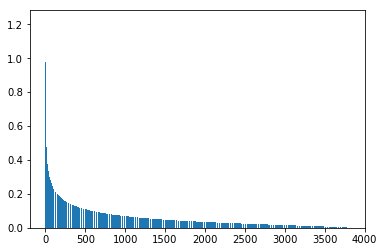

In [11]:
# visualise the SVD eigenvalues as a barchart to see most significant
tmt.visualisation.plot_bar_chart(eigenvalues)

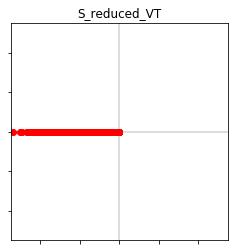

In [12]:
# get document-view projection onto 2 dimensions
document_view = tmt.svd.get_document_view(cr.content_directory)

# plot documents in reduced dimension space with a 2-d scatter 
tmt.visualisation.plot_scatter_chart(document_view)

In [13]:
document_view.T[document_view.T[1] < -0.006]

,0,1


In [15]:
# get top n topics, n is usually the same as key dimensions identified by the eigenvalue bar chart above
number_of_topics = 10
# how many words in each topic (the most significant)
topic_length = 10

topics_list = tmt.svd.get_topics(cr.content_directory, number_of_topics, topic_length)

In [16]:
for i, topic in enumerate(topics_list):
    print(" topic #", i)
    print(topic, "\n")
    pass

 topic # 0
inquiry         0.238646
police          0.233339
secretary       0.228070
justice         0.213491
letter          0.200483
scrutiny        0.198494
yorkshire       0.195255
london          0.186311
reference       0.180697
hillsborough    0.175345
Name: 0, dtype: float64 

 topic # 1
rfctr6fltyj        9.754874e-01
statement          9.668067e-17
stand              9.368396e-17
report             7.629219e-17
people             6.985798e-17
private            6.167880e-17
ground             5.815512e-17
recommendations    5.815209e-17
recommendation     5.489136e-17
yorkshire          5.228198e-17
Name: 1, dtype: float64 

 topic # 2
chevf             7.613946e-01
superintendent    1.157154e-16
rover             1.024354e-16
leppings          8.931737e-17
aoorv             7.558747e-17
dspys             7.558747e-17
cuxjo             7.558747e-17
chapman           6.959515e-17
football          6.090088e-17
trapped           5.805032e-17
Name: 2, dtype: float64 

 topic # 

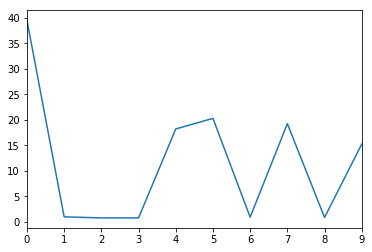

In [17]:
# indicator of topic significance by visualising the magnitude of the topic elements
x = tmt.svd.get_word_view(cr.content_directory,10)
x.abs().sum().plot()